![Olist](Olist_pics/logo-olist.png)

# Exploratory Data Analysis

Let's take a look at each dataset, individually, to get a better understanding of the provided data.
Look at some distributions and descriptive statistics.

**ORDERS with ITEM**:
- Visualizations: Monthly Orders and monthly GMV, Top Ten sellers (in number of transactions and total sold terms), Price and Freight distributions, Number of items per transaction, Top 20 most popular products.
- Descriptive: #Number of transactions per seller and #Number of items sold per binned price.

**PRODUCTS**:
- Product Category of items with price higher than BRL3,500 and  top 10/20 most sold products, Top 20 products sold (per number sold), #Number of products per binned number of sales.

**PRODUCT CATEGORY**:
- Visualizations: Top 20 product Categories per # of products sold, Quarter count of Top 5 most purchased categories.

**ORDER STATUS:**
- Descriptive: #Order_Status of missing values (per datestamp)

**CUSTOMER & SELLER DATA:**
- Observations&Next Steps: There are repeating customers! City names need cleaning for both dataset

**REVIEWS:**
- Cloud of Words: Most common words on good and bad reviews
- Distribution of Review Score (being 'good'(4 and 5) +76% of the total)

**MQLs**
- Visualizations: Monthly MQL volume, Monthly MQL Volume by Marketing Channel, 

**CLOSED DEALS**
- Visualizations: Volume of new sellers per Business Segment, Volume of new sellers per Lead Type, Monthly Seller Closed Deals Volume, Monthly conversion rate by channel 

In [1]:
#Importing Libraries & set up
import byMontse as byM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image

#Display Options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

#Configure Visualizations
%matplotlib inline
custom_params = {"axes.spines.right": False, "axes.spines.top": False, 'grid.linestyle': '--','figure.figsize': [12, 10], 'font.size': 16}
sns.set_theme(style='ticks', rc=custom_params)
base_color=sns.color_palette()[0]

#Warnings Mng
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Data

In [2]:
path = 'Olist_data'
files = os.listdir(path)
for i, f in enumerate(files):
    print(i+1,' - ',f)

1  -  olist_closed_deals_dataset.csv
2  -  olist_customers_dataset.csv
3  -  olist_geolocation_dataset.csv
4  -  olist_marketing_qualified_leads_dataset.csv
5  -  olist_orders_dataset.csv
6  -  olist_order_items_dataset.csv
7  -  olist_order_payments_dataset.csv
8  -  olist_order_reviews_dataset.csv
9  -  olist_products_dataset.csv
10  -  olist_product_category_name_translation.csv
11  -  olist_sellers_dataset.csv
12  -  other_brazil_cities.csv
13  -  other_stopWordsPt.txt


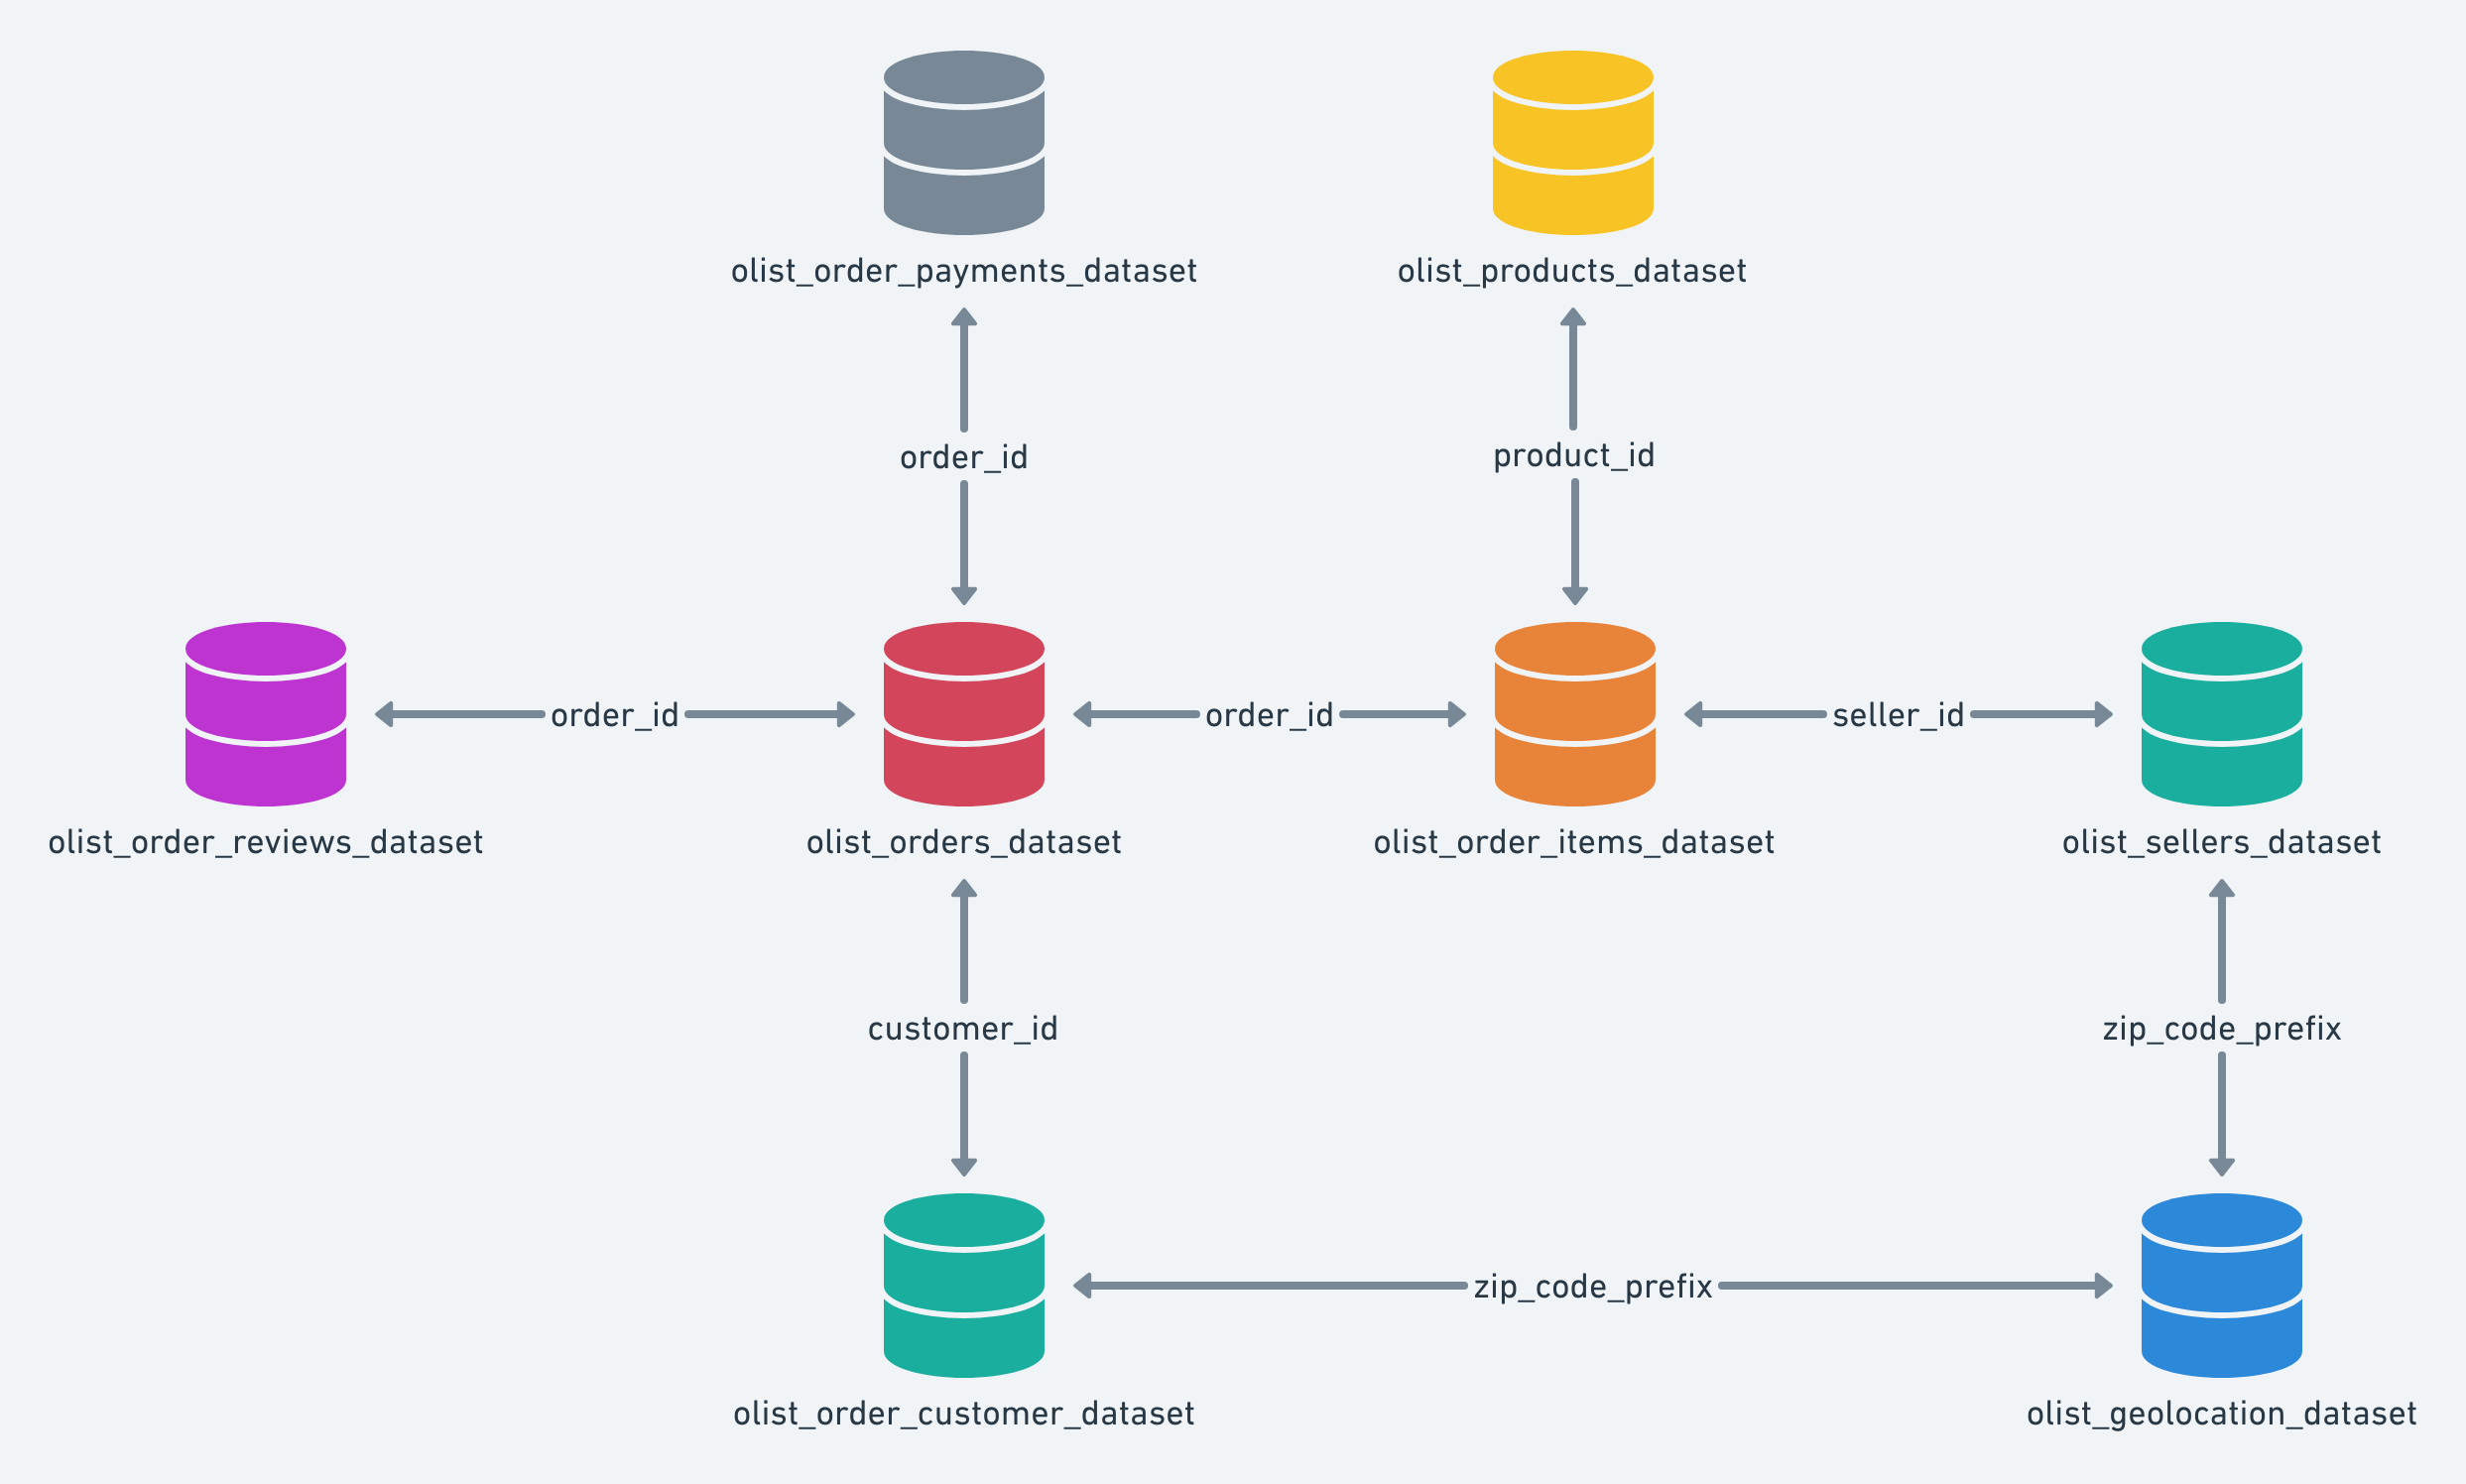

In [3]:
Image(filename='Olist_pics/HRhd2Y0.png') 

### 01. Orders

- How many items are sold by transaction? 
- What are the most popular sellers/products? 
- Is transactions volume increasing over time?

In [4]:
order_item=pd.read_csv('Olist_data/olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])
byM.datasummary(order_item).fillna('').replace(0,'')

Dataset Shape: (112650, 7)


,dtypes,count,unique,missing,top,freq,mean,min,25%,50%,75%,max,std,First Value
order_id,object,112650.00,98666,,8272b63d03f5f79c56e9e4120aec44ef,21,,,,,,,,00010242fe8c5a6d1ba2dd792cb16214
order_item_id,int64,112650.00,,,,,1.20,1.00,1.00,1.00,1.00,21.00,0.71,1
product_id,object,112650.00,32951,,aca2eb7d00ea1a7b8ebd4e68314663af,527,,,,,,,,4244733e06e7ecb4970a6e2683c13e61
seller_id,object,112650.00,3095,,6560211a19b47992c3666cc44a7e94c0,2033,,,,,,,,48436dade18ac8b2bce089ec2a041202
shipping_limit_date,datetime64[ns],112650.00,,,,,2018-01-07 15:36:52.192694528,2016-09-19 00:15:34,2017-09-20 20:57:27.500000,2018-01-26 13:59:35,2018-05-10 14:34:00.750000128,2020-04-09 22:35:08,,2017-09-19 09:45:35
price,float64,112650.00,,,,,120.65,0.85,39.90,74.99,134.90,6735.00,183.63,58.90
freight_value,float64,112650.00,,,,,19.99,,13.08,16.26,21.15,409.68,15.81,13.29


#### Observations:
    - 112650 items sold. Almost same number of orders, as (probably) more than 75% of orders only have 1 item.
    - There are some outlier with shipping_limit_date in 2020
    - Most common seller, 6560211a19b47992c3666cc44a7e94c0, shows 2033 orders.

In [5]:
# Visualize monthly orders
#fig, ax = plt.subplots( figsize=(20,8), sharex=True)
#axis[0].set_title("Monthly Orders", fontsize=14)
#axis[0].set_ylabel('number of transactions')
#axis[1].set_title('Monthly Gross Merchandise Value', fontsize=14)
#axis[1].set_ylabel('sold in BRL')


#volume=order_item.groupby(order_item.loc[order_item['shipping_limit_date'].dt.year<=2018]['shipping_limit_date'].dt.to_period('M'))['order_id'].count()#.plot(kind='line')
#RBL=order_item.groupby(order_item.loc[order_item['shipping_limit_date'].dt.year<=2018]['shipping_limit_date'].dt.to_period('M'))['price'].sum()#.plot(kind='line')
#monthlyorders_df=pd.concat([volume, RBL], axis=1)
#monthlyorders_df.head()

# Plot the CO2 variable in blue
#ax.plot(monthlyorders_df.index.astype(str), monthlyorders_df["order_id"], color='b')
#ax2 = ax.twinx()
#ax2.plot(monthlyorders_df.index.astype(str), monthlyorders_df["price"], color='r')
#plt.show()
#plt.savefig('Olist_saved/monthlysales.png')                                                                                                                                                

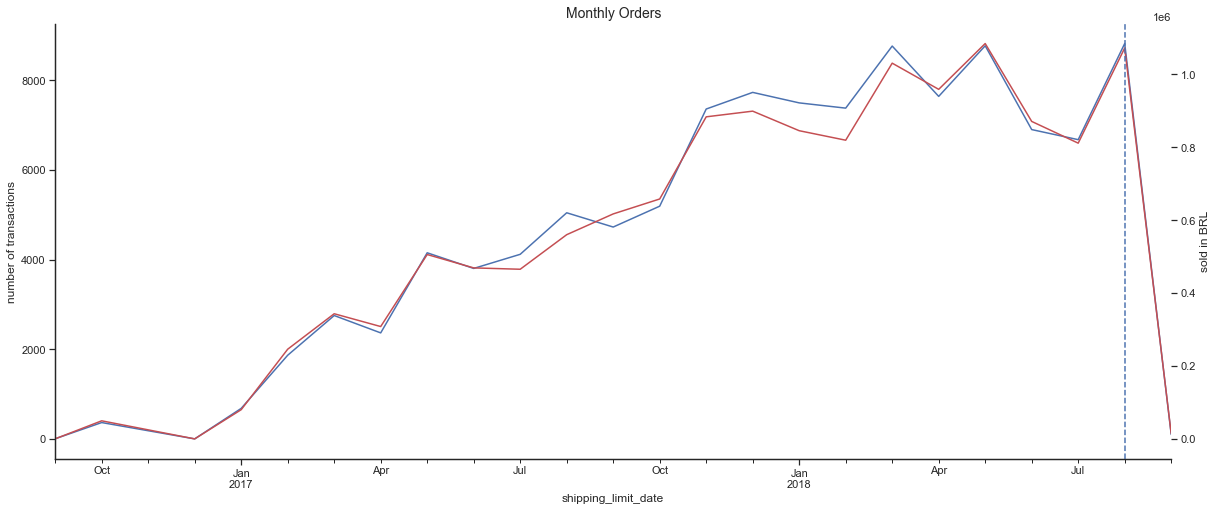

In [6]:
# Visualize monthly orders
fig, ax = plt.subplots( figsize=(20,8), sharex=True)

order_item.groupby(order_item.loc[order_item['shipping_limit_date'].dt.year<=2018]['shipping_limit_date'].dt.to_period('M'))['order_id'].count().plot(kind='line', ax=ax, color='b')
ax2 = ax.twinx()
order_item.groupby(order_item.loc[order_item['shipping_limit_date'].dt.year<=2018]['shipping_limit_date'].dt.to_period('M'))['price'].sum().plot(kind='line', ax=ax2, color='r')
#monthlyorders_df=pd.concat([volume, RBL], axis=1)
#monthlyorders_df.head()
plt.title("Monthly Orders", fontsize=14)
ax.set_ylabel('number of transactions')
#axis[1].set_title('Monthly Gross Merchandise Value', fontsize=14)
ax2.set_ylabel('sold in BRL')
# Plot the CO2 variable in blue
#ax.plot(monthlyorders_df.index.astype(str), monthlyorders_df["order_id"], color='b')
plt.axvline('2018-08', linestyle= '--')
#ax2.plot(monthlyorders_df.index.astype(str), monthlyorders_df["price"], color='r')

plt.savefig('Olist_saved/monthlysales.png')  
plt.show()

##### Observations:
    - Transactions from October, 2016 to August, 2018
    - Monthly number of transactions as well as monthly amount sold in BRL shows a steady increase overtime.
    - Both measures are converging.

In [7]:
print('Orders with shipping date >sept-2018')
order_item[order_item.shipping_limit_date>'2018-10']

Orders with shipping date >sept-2018


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
8643,13bdf405f961a6deec817d817f5c6624,1,96ea060e41bdecc64e2de00b97068975,7a241947449cc45dbfda4f9d0798d9d0,2020-02-05 03:30:51,69.99,14.66
68516,9c94a4ea2f7876660fa6f1b59b69c8e6,1,282b126b2354516c5f400154398f616d,7a241947449cc45dbfda4f9d0798d9d0,2020-02-03 20:23:22,75.99,14.70
85729,c2bb89b5c1dd978d507284be78a04cb2,1,87b92e06b320e803d334ac23966c80b1,7a241947449cc45dbfda4f9d0798d9d0,2020-04-09 22:35:08,99.99,61.44
85730,c2bb89b5c1dd978d507284be78a04cb2,2,87b92e06b320e803d334ac23966c80b1,7a241947449cc45dbfda4f9d0798d9d0,2020-04-09 22:35:08,99.99,61.44


In [8]:
print('Number of total items sold by this seller:',order_item[order_item.seller_id=='7a241947449cc45dbfda4f9d0798d9d0'].shape[0])

Number of total items sold by this seller: 72


##### Observations:
    - All products with shipping_date more recent than Oct,2018 are from the same seller. 
    - Not all the products are the same.
    - This seller has sold 72 items total

66 sellers are both Top 100 per #of transactions and total revenue


<AxesSubplot:title={'center':'Top Sellers per Revenue'}, xlabel='seller_id'>

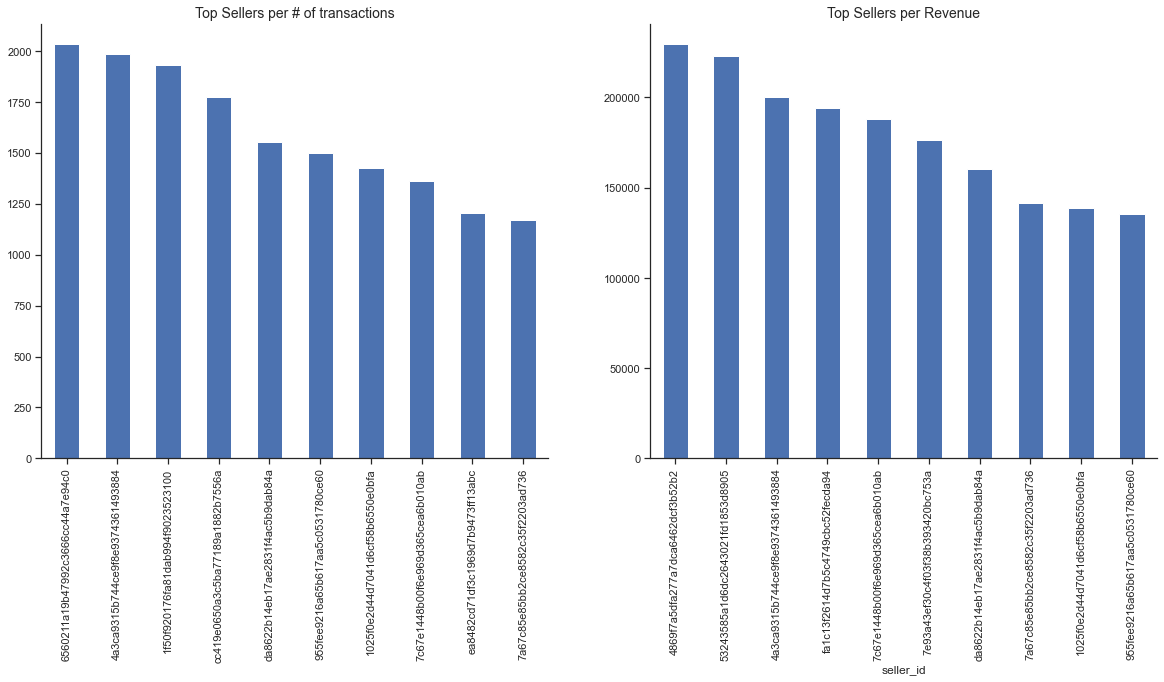

In [9]:
#Visualize Top Sellers
top_=order_item['seller_id'].value_counts().nlargest(100).index.isin(order_item.groupby('seller_id')['price'].sum().nlargest(100).index)
top_sellers=order_item['seller_id'].value_counts().nlargest(100).index[top_]
print(np.sum(order_item['seller_id'].value_counts().nlargest(100).index.isin(order_item.groupby('seller_id')['price'].sum().nlargest(100).index)),
      'sellers are both Top 100 per #of transactions and total revenue')

fig, axis = plt.subplots(1, 2, figsize=(20,8))
axis[0].set_title("Top Sellers per # of transactions", fontsize=14)
axis[1].set_title("Top Sellers per Revenue", fontsize=14)

order_item['seller_id'].value_counts().nlargest(10).plot(kind='bar', ax=axis[0])
order_item.groupby('seller_id')['price'].sum().nlargest(10).plot(kind='bar', ax=axis[1])

In [10]:
# Number of transactions per seller
order_item.seller_id.value_counts() 
print('Total sellers: ', order_item.seller_id.nunique())
print('Number of sellers with >=1000 transactions: ',np.sum(order_item.groupby('seller_id')['seller_id'].count()>=1000))
print('Number of sellers with number of transactions between [100,1000): ',np.sum((order_item.groupby('seller_id')['seller_id'].count()<1000)&(order_item.groupby('seller_id')['seller_id'].count()>=100)))
print('Number of sellers with number of transactions between [2,100) : ',np.sum((order_item.groupby('seller_id')['seller_id'].count()<100)&(order_item.groupby('seller_id')['seller_id'].count()>1)))
print('Number of sellers with only one transaction: ',np.sum(order_item.groupby('seller_id')['seller_id'].count()==1))

Total sellers:  3095
Number of sellers with >=1000 transactions:  13
Number of sellers with number of transactions between [100,1000):  226
Number of sellers with number of transactions between [2,100) :  2347
Number of sellers with only one transaction:  509


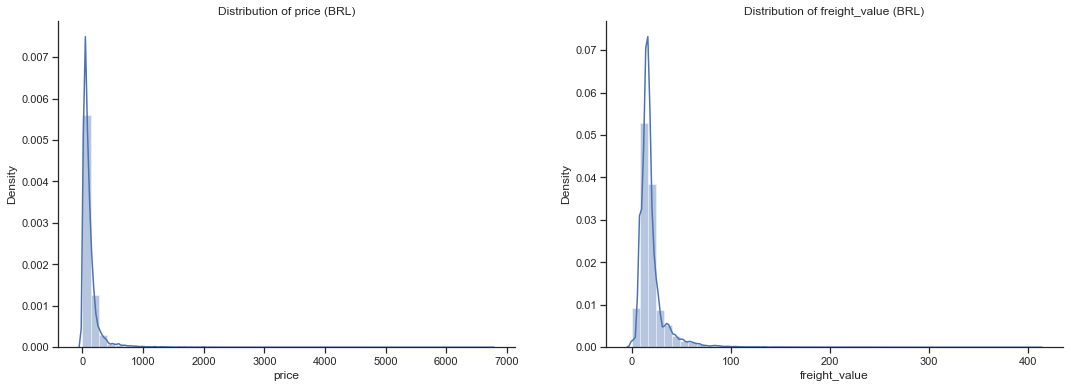

In [11]:
# Visualize price and freight_value distributions 
dollar_cols=['price', 'freight_value']
fig, axis = plt.subplots(1, len(dollar_cols), figsize=(18,6))
for i, column in enumerate(dollar_cols):
    sns.distplot(order_item[column], ax=axis[i])
    axis[i].set_title('Distribution of '+ str(column)+ ' (BRL)')
plt.savefig('Olist_saved/priceDistribution.png')

In [12]:
#Number of items sold per price bin
print('Number of items with price >1000 BRL:', len(order_item[order_item.price>1000]))
print('Number of items with price >2000 BRL:', len(order_item[order_item.price>2000]))
print('Number of items with price >3000 BRL:', len(order_item[order_item.price>3000]))
print('Number of items with price >4000 BRL:', len(order_item[order_item.price>4000]))
order_item[order_item.price>4000]

Number of items with price >1000 BRL: 844
Number of items with price >2000 BRL: 123
Number of items with price >3000 BRL: 25
Number of items with price >4000 BRL: 9


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
29193,426a9742b533fc6fed17d1fd6d143d7e,1,a1beef8f3992dbd4cd8726796aa69c53,512d298ac2a96d1931b6bd30aa21f61d,2018-08-16 14:24:28,4399.87,113.45
45843,68101694e5c5dc7330c91e1bbc36214f,1,6cdf8fc1d741c76586d8b6b15e9eef30,ed4acab38528488b65a9a9c603ff024a,2018-04-05 08:27:27,4099.99,75.27
62086,8dbc85d1447242f3b127dda390d56e19,1,259037a6a41845e455183f89c5035f18,c72de06d72748d1a0dfb2125be43ba63,2018-06-28 12:36:36,4590.00,91.78
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
78310,b239ca7cd485940b31882363b52e6674,1,dd113cb02b2af9c8e5787e8f1f0722f6,821fb029fc6e495ca4f08a35d51e53a5,2018-08-02 08:15:14,4059.00,104.51
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21


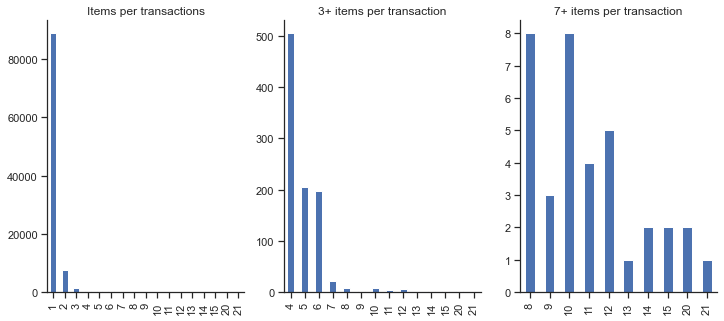

In [13]:
# Visualize Items per transaction
fig, axis = plt.subplots(1, 3, figsize=(12,5))
axis[0].set_title("Items per transactions")
axis[1].set_title("3+ items per transaction")
axis[2].set_title("7+ items per transaction")
max_items=order_item.groupby('order_id').order_item_id.max().value_counts(sort=False)
max_items.plot(kind='bar', ax=axis[0]) # number of transactions per number of items
max_items.loc[max_items.index>3].plot(kind='bar', ax=axis[1]) # number of transactions per number of items
max_items.loc[max_items.index>7].plot(kind='bar', ax=axis[2]) # number of transactions per number of items

plt.savefig('Olist_saved/itemspertransaction.png')

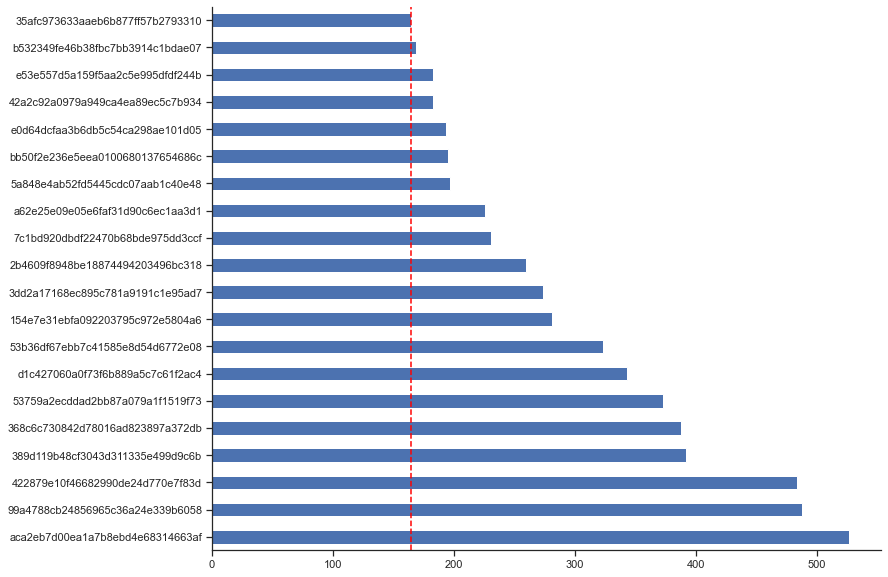

In [14]:
#Top 20 products sold (per number sold)
order_item.product_id.value_counts().nlargest(20).plot(kind='barh')
plt.axvline(order_item.product_id.value_counts().nlargest(20).min(), linestyle='--', color='red')
plt.show()

In [15]:
#Number of products per number of sales
print('Unpopular products with only one sales:',np.sum(order_item.product_id.value_counts()==1))
print('Most popular products (more than 100 sold items):',np.sum(order_item.product_id.value_counts()>100))
print('Total unique items offered:',order_item.product_id.nunique())

Unpopular products with only one sales: 18117
Most popular products (more than 100 sold items): 57
Total unique items offered: 32951


Next Steps: 

    - Check product category for price and freight_values "outliers" and double-check if it makes sense.
    - Bin sellers per amount of transactions and total revenue.
    - Top_sellers variable includes 66 seller_id that are in the top 100 revenue and top100 transactions.

### 02. Products
    - What are the most popular product categories? How about the less popular?
    - What is the weight of most expensive products to ship?
    - What is the category of the most expensive products?

In [16]:
#let's check all offered products
products=pd.read_csv('Olist_data/olist_products_dataset.csv')
byM.datasummary(products).fillna('').replace(0,'')

Dataset Shape: (32951, 9)


,dtypes,count,unique,missing,top,freq,mean,std,min,25%,50%,75%,max,First Value
product_id,object,32951.00,32951,,23834e58166d8ba5ccce5463b878683e,1,,,,,,,,1e9e8ef04dbcff4541ed26657ea517e5
product_category_name,object,32341.00,73,610,cama_mesa_banho,3029,,,,,,,,perfumaria
product_name_lenght,float64,32341.00,,610,,,48.48,10.25,5.00,42.00,51.00,57.00,76.00,40.00
product_description_lenght,float64,32341.00,,610,,,771.50,635.12,4.00,339.00,595.00,972.00,3992.00,287.00
product_photos_qty,float64,32341.00,,610,,,2.19,1.74,1.00,1.00,1.00,3.00,20.00,1.00
product_weight_g,float64,32949.00,,2,,,2276.47,4282.04,,300.00,700.00,1900.00,40425.00,225.00
product_length_cm,float64,32949.00,,2,,,30.82,16.91,7.00,18.00,25.00,38.00,105.00,16.00
product_height_cm,float64,32949.00,,2,,,16.94,13.64,2.00,8.00,13.00,21.00,105.00,10.00
product_width_cm,float64,32949.00,,2,,,23.20,12.08,6.00,15.00,20.00,30.00,118.00,14.00


In [17]:
#Are the most expensive products to ship very heavy?
expensive_freight=order_item[order_item.freight_value>150]['product_id']
products[products.product_id.isin(expensive_freight)]['product_weight_g'].unique()

array([13825.,   650., 14900., 30000., 20600.,  1000., 20850., 17950.,
       19300., 15200., 25325., 16300., 14675., 20050., 15300.,   250.,
       15450., 13800., 20500., 29700., 16133., 13700.,  7750., 19650.,
        5000., 11300., 14300., 11400., 14400., 18900., 13867., 28800.,
       15750., 14000., 25100., 27050., 27150., 12200., 20150., 18000.,
       12125., 23350., 25250., 16650., 13000., 15900.,  7400.,  5650.,
       10450.,  9660., 23950.,  7950., 26700., 21400., 20450., 19200.,
       29600.,  9200., 21800., 28450., 22350., 19150.,  6450., 22600.,
       22300.,  5660., 18700., 14150.,  8500., 28300., 22525., 24050.,
       27600., 16000., 13050., 12800., 22983., 20650., 19000., 25850.,
       17550., 20325., 29050., 18050.,  8450., 11450., 26100., 13250.,
       25000., 16333., 26950., 17050., 16150., 16050., 23500.])

In [18]:
#Product Category of items with price higher than BRL3,500
expensive_products=order_item[order_item.price>3500]['product_id']
products[products.product_id.isin(expensive_products)]['product_category_name'].unique()

array(['bebes', 'utilidades_domesticas', 'eletroportateis',
       'relogios_presentes', 'esporte_lazer', 'artes',
       'informatica_acessorios', 'pcs', 'ferramentas_jardim',
       'consoles_games', 'instrumentos_musicais', nan], dtype=object)

In [19]:
# Product Category Name of top 20 most sold products
most_sold=order_item.product_id.value_counts().nlargest(20).index
products[products.product_id.isin(most_sold)]['product_category_name'].unique()

array(['relogios_presentes', 'beleza_saude', 'ferramentas_jardim',
       'informatica_acessorios', 'cama_mesa_banho', 'moveis_decoracao',
       nan, 'casa_conforto', 'utilidades_domesticas'], dtype=object)

In [20]:
# Product Category Name of top 10 most sold products
most_popular_products=order_item.product_id.value_counts().nlargest(10).index
products[products.product_id.isin(most_popular_products)]['product_category_name'].unique()

array(['relogios_presentes', 'beleza_saude', 'ferramentas_jardim',
       'informatica_acessorios', 'cama_mesa_banho', 'moveis_decoracao'],
      dtype=object)

In [21]:
# Product Category Name of top 10 least sold products
least_popular_products=order_item.product_id.value_counts().nsmallest(10).index
products[products.product_id.isin(least_popular_products)]['product_category_name'].unique()

array(['brinquedos', 'esporte_lazer', 'moveis_decoracao',
       'relogios_presentes', 'informatica_acessorios', 'livros_tecnicos',
       'livros_interesse_geral'], dtype=object)

In [22]:
#All product category names
products['product_category_name'].unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

##### Observations:
    - 610 missing values for product_category_name, product_name_lenght, product_description_lenght, product_photos_qty are the same product, plus on one of them we are also missing product weight, lenght, ...
    - Products with misssing info have been sold too.
    - Some relative low-weighted items' freight_values are high. Possibly,freigh_value variable is also influenced by distance between seller city and customer city.
    - Curiously, most and least 10 products include watches.

### 03. ProductCategoryTranslation 
#### (+ Orders + Product)

In [23]:
pcategory_translation=pd.read_csv('Olist_data/olist_product_category_name_translation.csv')
product_sales=pd.merge(order_item, products, how='left', on='product_id')
product_sales=pd.merge(product_sales, pcategory_translation, how='left', on='product_category_name')
product_sales.product_category_name.fillna('missing', inplace=True)
product_sales.product_category_name_english.fillna('missing', inplace=True)
byM.datasummary(product_sales).fillna('').replace(0,'')

Dataset Shape: (112650, 16)


,dtypes,count,unique,missing,top,freq,mean,min,25%,50%,75%,max,std,First Value
order_id,object,112650.00,98666,,8272b63d03f5f79c56e9e4120aec44ef,21,,,,,,,,00010242fe8c5a6d1ba2dd792cb16214
order_item_id,int64,112650.00,,,,,1.20,1.00,1.00,1.00,1.00,21.00,0.71,1
product_id,object,112650.00,32951,,aca2eb7d00ea1a7b8ebd4e68314663af,527,,,,,,,,4244733e06e7ecb4970a6e2683c13e61
seller_id,object,112650.00,3095,,6560211a19b47992c3666cc44a7e94c0,2033,,,,,,,,48436dade18ac8b2bce089ec2a041202
shipping_limit_date,datetime64[ns],112650.00,,,,,2018-01-07 15:36:52.192694528,2016-09-19 00:15:34,2017-09-20 20:57:27.500000,2018-01-26 13:59:35,2018-05-10 14:34:00.750000128,2020-04-09 22:35:08,,2017-09-19 09:45:35
price,float64,112650.00,,,,,120.65,0.85,39.90,74.99,134.90,6735.00,183.63,58.90
freight_value,float64,112650.00,,,,,19.99,,13.08,16.26,21.15,409.68,15.81,13.29
product_category_name,object,112650.00,74,,cama_mesa_banho,11115,,,,,,,,cool_stuff
product_name_lenght,float64,111047.00,,1603,,,48.78,5.00,42.00,52.00,57.00,76.00,10.03,58.00
product_description_lenght,float64,111047.00,,1603,,,787.87,4.00,348.00,603.00,987.00,3992.00,652.14,598.00


% transactions most common category 0.09866844207723036


Text(0.5, 0, 'proportion of total transactions')

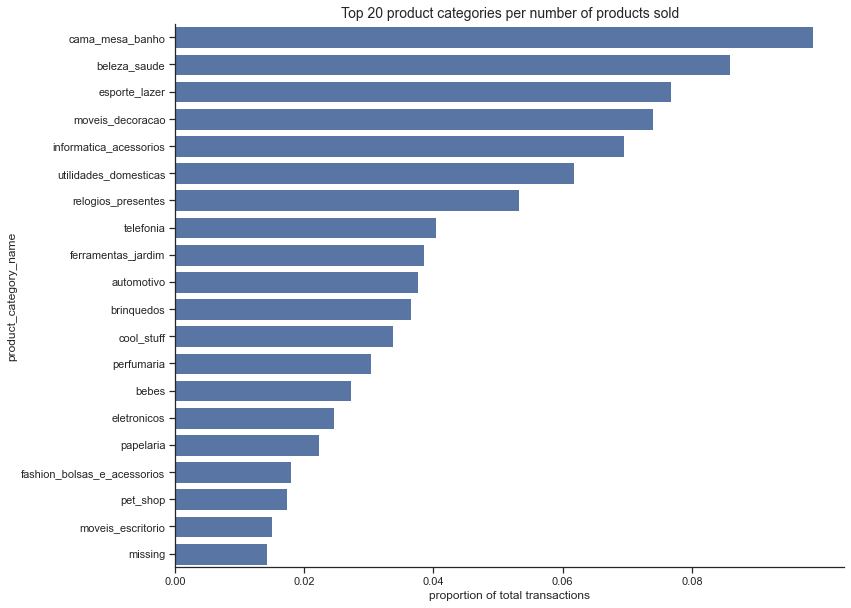

In [24]:
#Top 20 product Categories per # of products sold
n_cat=product_sales.product_category_name.value_counts().sum()
max_prop=product_sales.product_category_name.value_counts()[0]/n_cat
print('% transactions most common category', max_prop)
base_color = sns.color_palette()[0]
# Use numpy.arange() function to produce a set of evenly spaced proportioned values between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
sns.countplot(data=product_sales, y='product_category_name', color=base_color, order=product_sales.product_category_name.value_counts().iloc[:20].index);
plt.title('Top 20 product categories per number of products sold', fontsize=14)
plt.xticks(tick_props * n_cat, tick_names)
plt.xlabel('proportion of total transactions')

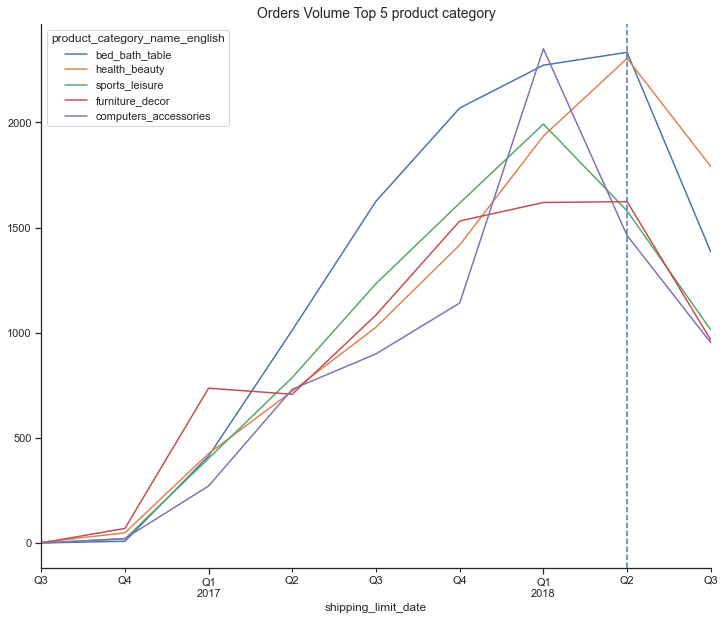

<Figure size 864x720 with 0 Axes>

In [25]:
# Create 'product category-time series' table (per number of transactions)
category_sales_Q = pd.pivot_table(product_sales,
                            index='product_category_name_english',
                            columns=product_sales['shipping_limit_date'].dt.to_period('Q'),
                            values='order_id',                            
                            aggfunc='count',
                            fill_value=0)
category_list = product_sales.groupby('product_category_name_english').order_id.count().sort_values(ascending=False).index
category_sales_Q = category_sales_Q.reindex(category_list)

# Top 5 most purchased categories per quartery count
top10category_sales_Q = category_sales_Q[:5]
top10category_sales_Q=top10category_sales_Q.loc[:,top10category_sales_Q.columns.year <= 2018]
top10category_sales_Q.T.plot(kind='line')
plt.title('Orders Volume Top 5 product category', fontsize=14)
plt.axvline('2018Q2', linestyle= '--')
plt.show()
plt.savefig('Olist_saved/OrdersVolumeTop5cat.png')

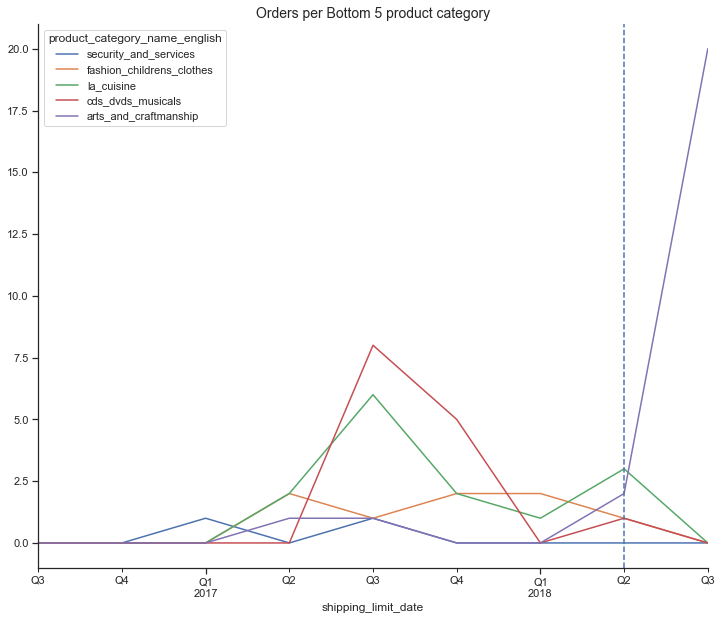

In [26]:
# Bottom 5 (least) purchased categories per quartery count
Bcategory_list = product_sales.groupby('product_category_name_english').order_id.count().sort_values(ascending=True).index
Bcategory_sales_Q = category_sales_Q.reindex(Bcategory_list)
B10category_sales_Q = Bcategory_sales_Q[:5]
B10category_sales_Q=B10category_sales_Q.loc[:,B10category_sales_Q.columns.year <= 2018]
B10category_sales_Q.T.plot(kind='line')
plt.title('Orders per Bottom 5 product category', fontsize=14)
plt.axvline('2018Q2', linestyle= '--')
plt.show()

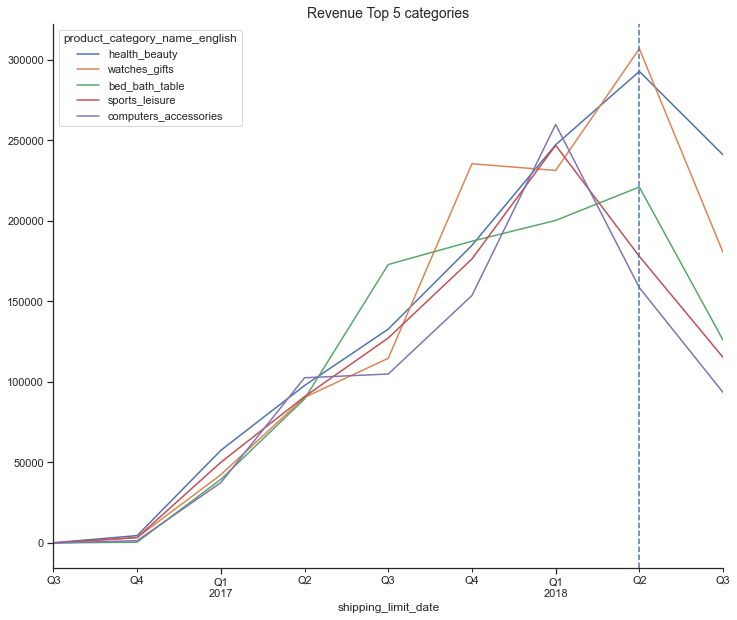

<Figure size 864x720 with 0 Axes>

In [27]:
# Create 'product category-time series' table (per number of transactions)
cat_rev_Q = pd.pivot_table(product_sales,
                            index='product_category_name_english',
                            columns=product_sales['shipping_limit_date'].dt.to_period('Q'),
                            values='price',                            
                            aggfunc='sum',
                            fill_value=0)
catp_list = product_sales.groupby('product_category_name_english').price.sum().sort_values(ascending=False).index
cat_rev_Q = cat_rev_Q.reindex(catp_list)

# Top 5 revenue categories per quartery count
top10cat_price_Q = cat_rev_Q[:5].loc[:,cat_rev_Q.columns.year <= 2018]
top10cat_price_Q.T.plot(kind='line')
plt.title('Revenue Top 5 categories', fontsize=14)
plt.axvline('2018Q2', linestyle= '--')
plt.show()
plt.savefig('Olist_saved/RevenueTop5cat.png')

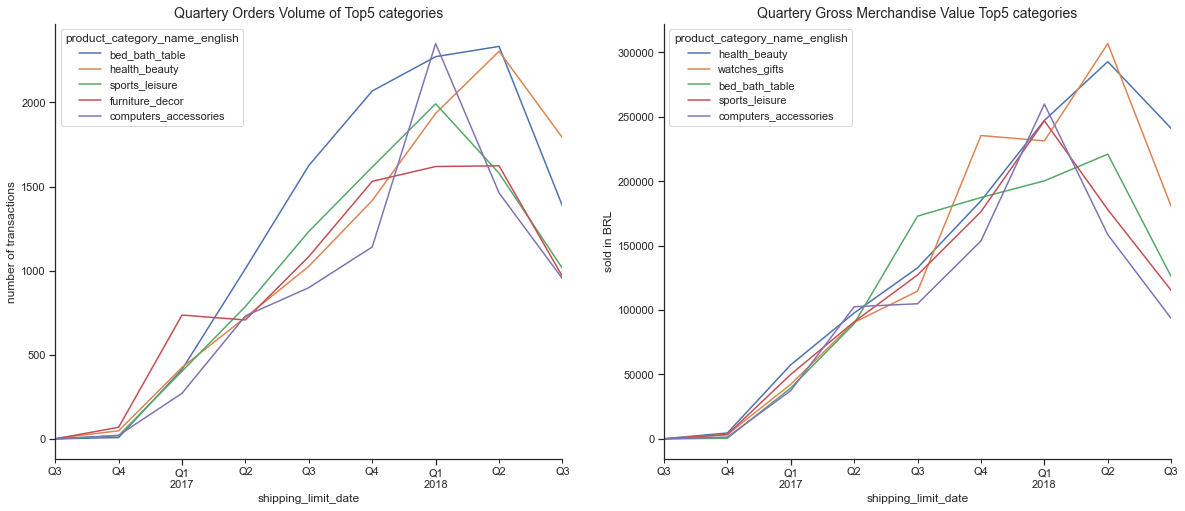

In [28]:
# Visualize monthly orders
fig, axis = plt.subplots(1, 2, figsize=(20,8))
axis[0].set_title("Quartery Orders Volume of Top5 categories", fontsize=14)
axis[0].set_ylabel('number of transactions')
axis[1].set_title('Quartery Gross Merchandise Value Top5 categories', fontsize=14)
axis[1].set_ylabel('sold in BRL')

top10category_sales_Q.T.plot(kind='line', ax=axis[0])
top10cat_price_Q.T.plot(kind='line',ax=axis[1])
plt.savefig('Olist_saved/Top5cat_vol&rev.png')

### 04. Orders

In [29]:
orders=pd.read_csv('Olist_data/olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'])
byM.datasummary(orders).fillna('').replace(0,'')

Dataset Shape: (99441, 8)


,dtypes,count,unique,missing,top,freq,mean,min,25%,50%,75%,max,First Value
order_id,object,99441,99441,,f1fc8634fad0f0a2b838c28a680deb92,1,,,,,,,e481f51cbdc54678b7cc49136f2d6af7
customer_id,object,99441,99441,,77a3f425bfe0e078f75c7ae410d5207b,1,,,,,,,9ef432eb6251297304e76186b10a928d
order_status,object,99441,8,,delivered,96478,,,,,,,delivered
order_purchase_timestamp,datetime64[ns],99441,,,,,2017-12-31 08:43:12.776567552,2016-09-04 21:15:19,2017-09-12 14:46:19,2018-01-18 23:04:36,2018-05-04 15:42:16,2018-10-17 17:30:18,2017-10-02 10:56:33
order_approved_at,datetime64[ns],99281,,160,,,2017-12-31 18:35:24.098819328,2016-09-15 12:16:38,2017-09-12 23:24:16,2018-01-19 11:36:13,2018-05-04 20:35:10,2018-09-03 17:40:06,2017-10-02 11:07:15
order_delivered_carrier_date,datetime64[ns],97658,,1783,,,2018-01-04 21:49:48.138288384,2016-10-08 10:34:01,2017-09-15 22:28:50.249999872,2018-01-24 16:10:58,2018-05-08 13:37:45,2018-09-11 19:48:28,2017-10-04 19:55:00
order_delivered_customer_date,datetime64[ns],96476,,2965,,,2018-01-14 12:09:19.035550464,2016-10-11 13:46:32,2017-09-25 22:07:22.249999872,2018-02-02 19:28:10.500000,2018-05-15 22:48:52.249999872,2018-10-17 13:22:46,2017-10-10 21:25:13
order_estimated_delivery_date,datetime64[ns],99441,,,,,2018-01-24 03:08:37.730113792,2016-09-30 00:00:00,2017-10-03 00:00:00,2018-02-15 00:00:00,2018-05-25 00:00:00,2018-11-12 00:00:00,2017-10-18 00:00:00


##### Observations:
    - No repeating customers. Probably because the provided data is a sample from real data.
    - There are missing values: what is the order_status for those items that have delivered dates missing?  

In [30]:
# Order_Status of missing values (per datestamp)
byM.missingsummary(orders, 'order_status').fillna('').replace(0,'')

,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
delivered,14.00,2.00,8
invoiced,,314.00,314
shipped,,,1107
processing,,301.00,301
unavailable,,609.00,609
canceled,141.00,550.00,619
created,5.00,5.00,5
approved,,2.00,2


#### Observations:
    - All missing values make sense for me, except the ones with order_status= 'delivered'


In [31]:
#Timeline and Number of order per year
print('Orders from {} to {}'.format(orders['order_purchase_timestamp'].min(), orders['order_purchase_timestamp'].max()),'\nNumber of orders per year:')
print('2016->',orders[orders['order_purchase_timestamp'].dt.year==2016]['order_id'].count())
print('2017->',orders[orders['order_purchase_timestamp'].dt.year==2017]['order_id'].count())
print('2018->',orders[orders['order_purchase_timestamp'].dt.year==2018]['order_id'].count())

Orders from 2016-09-04 21:15:19 to 2018-10-17 17:30:18 
Number of orders per year:
2016-> 329
2017-> 45101
2018-> 54011


### 05. Customers

In [32]:
# Meeting our customers!
customers=pd.read_csv('Olist_data\olist_customers_dataset.csv')
byM.datasummary(customers).fillna('').replace(0,'')

Dataset Shape: (99441, 5)


,dtypes,count,unique,missing,top,freq,mean,std,min,25%,50%,75%,max,First Value
customer_id,object,99441.00,99441,,2e19009aaf5ce281eadf19914ea75b5c,1,,,,,,,,06b8999e2fba1a1fbc88172c00ba8bc7
customer_unique_id,object,99441.00,96096,,8d50f5eadf50201ccdcedfb9e2ac8455,17,,,,,,,,861eff4711a542e4b93843c6dd7febb0
customer_zip_code_prefix,int64,99441.00,,,,,35137.47,29797.94,1003.00,11347.00,24416.00,58900.00,99990.00,14409
customer_city,object,99441.00,4119,,sao paulo,15540,,,,,,,,franca
customer_state,object,99441.00,27,,SP,41746,,,,,,,,SP


In [33]:
#Number of Repeating Customers:
print('Number of Repeating Customers:',np.sum(customers.customer_unique_id.value_counts()>1))

#Number of Repeating Customers:
print('Number of customers with more than 2 transactions:',np.sum(customers.customer_unique_id.value_counts()>2))
print('Number of customers with more than 5 transactions:',np.sum(customers.customer_unique_id.value_counts()>5))
print('Number of customers with more than 10 transactions:',np.sum(customers.customer_unique_id.value_counts()>10))

Number of Repeating Customers: 2997
Number of customers with more than 2 transactions: 252
Number of customers with more than 5 transactions: 11
Number of customers with more than 10 transactions: 1


In [34]:
#customers.groupby('customer_city')['customer_city'].count() # to show value counts alphabetically

##### Observations & Next Steps:
- Here they are! Repeted customers.
- Convert zip code to object 
- Customer City needs some cleaning

### 06. Sellers

In [35]:
#Let's meet our sellers!
sellers=pd.read_csv('Olist_data/olist_sellers_dataset.csv')
byM.datasummary(sellers).fillna('').fillna('').replace(0,'')

Dataset Shape: (3095, 4)


,dtypes,count,unique,missing,top,freq,mean,std,min,25%,50%,75%,max,First Value
seller_id,object,3095.00,3095,,f7c31656c19db6275a8acadca289f426,1,,,,,,,,3442f8959a84dea7ee197c632cb2df15
seller_zip_code_prefix,int64,3095.00,,,,,32291.06,32713.45,1001.00,7093.50,14940.00,64552.50,99730.00,13023
seller_city,object,3095.00,611,,sao paulo,694,,,,,,,,campinas
seller_state,object,3095.00,23,,SP,1849,,,,,,,,SP


In [36]:
#sellers.groupby('seller_city')['seller_city'].count()

##### Observations & Next Steps:
- Convert zip to object
- Seller city names should be clean

### 07. Reviews

#### Customer Feedback
- Are Olist customers happy?
- Most common words on good and bad reviews. Separate reviews with good scores and reviews with bad scores and word cloud

In [37]:
reviews=pd.read_csv('Olist_data/olist_order_reviews_dataset.csv')
byM.datasummary(reviews).fillna('').replace(0,'')

Dataset Shape: (99224, 7)


,dtypes,count,unique,missing,top,freq,mean,std,min,25%,50%,75%,max,First Value
review_id,object,99224.00,98410,,69a1068c3128a14994e3e422e4539e04,3,,,,,,,,7bc2406110b926393aa56f80a40eba40
order_id,object,99224.00,98673,,8e17072ec97ce29f0e1f111e598b0c85,3,,,,,,,,73fc7af87114b39712e6da79b0a377eb
review_score,int64,99224.00,,,,,4.09,1.35,1.00,4.00,5.00,5.00,5.00,4
review_comment_title,object,11568.00,4527,87656,Recomendo,423,,,,,,,,
review_comment_message,object,40977.00,36159,58247,Muito bom,230,,,,,,,,
review_creation_date,object,99224.00,636,,2017-12-19 00:00:00,463,,,,,,,,2018-01-18 00:00:00
review_answer_timestamp,object,99224.00,98248,,2017-06-15 23:21:05,4,,,,,,,,2018-01-18 21:46:59


Observations:

    - 11k reviews vs 87k no reviews(but with review score!)
    - Half review scores are 5! Only 25% or less are lower than 4!    

5   0.58
4   0.19
1   0.12
3   0.08
2   0.03
Name: review_score, dtype: float64


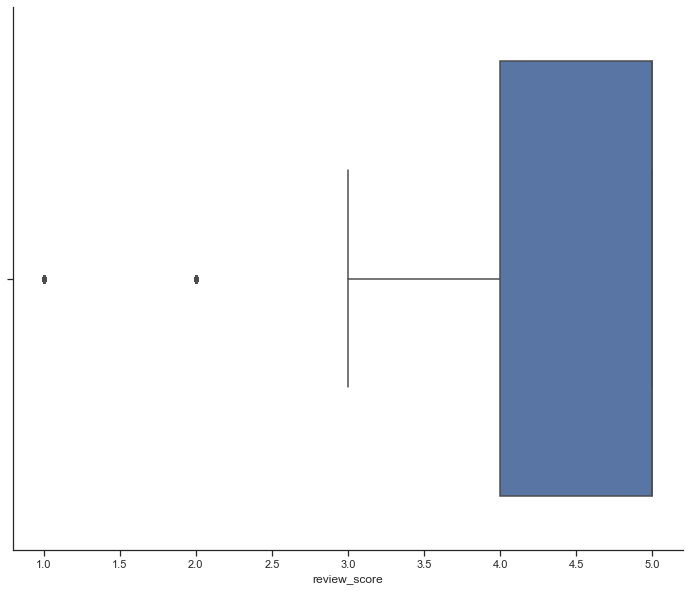

In [38]:
#Review Scores
print(reviews.review_score.value_counts(normalize=True))
sns.boxplot(reviews.review_score)
plt.show()

In [39]:
#Categorizing reviews as Good, Bad and Neutral
good_reviews=reviews[reviews.review_score>=4]
neutral_reviews=reviews[reviews.review_score==3]
bad_reviews=reviews[reviews.review_score<3]

In [40]:
#Defining 'stop words' (words that are just used for liking, without much or any content meaning) in Portuguese
stop=set(line.strip() for line in open('Olist_data/other_stopWordspt.txt', encoding='utf-8'))

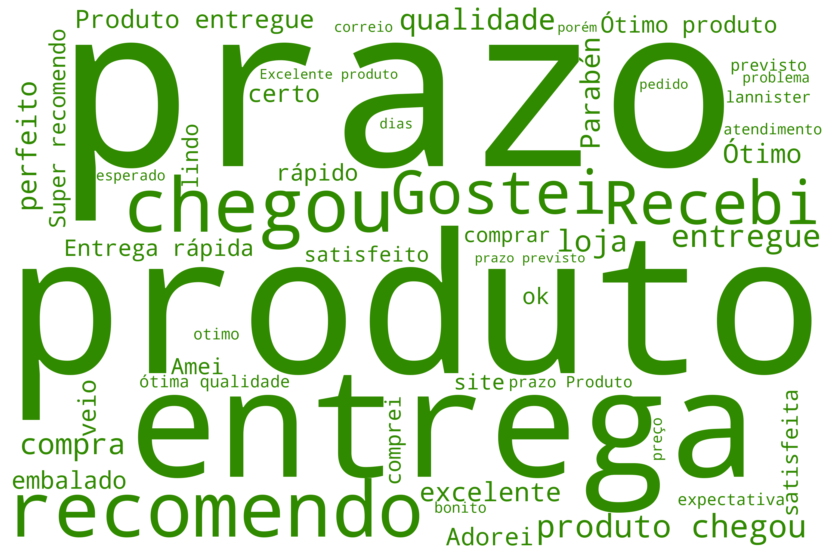

In [41]:
#good_score_reviews
wc_good = WordCloud(background_color="white",           # select background color
               width=3000,                         # set wight
               height=2000,                        # set height
               max_words=50,
                stopwords=stop).generate(' '.join(good_reviews.review_comment_message.dropna(axis=0)) )     # set max amount of words

wc_good.recolor(color_func = byM.green_func)          # set the word color to black
plt.figure(figsize=[15,10])                        # set the figsize
plt.imshow(wc_good, interpolation="bilinear")           # plot the wordcloud
plt.axis("off")                                    # remove plot axes
plt.savefig('Olist_saved/WC_Good.png')   

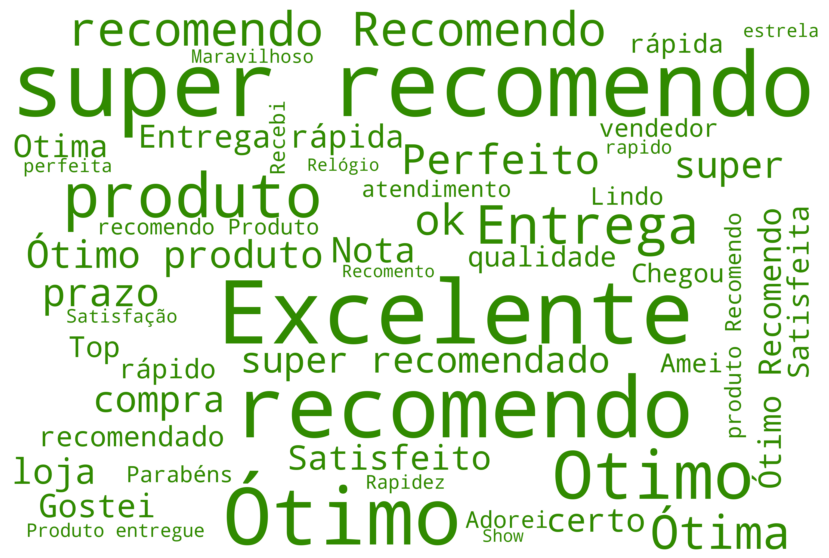

In [42]:
#good_score_title
wc_title_good = WordCloud(background_color="white",           # select background color
               width=3000,                         # set wight
               height=2000,                        # set height
               max_words=50,
                         stopwords=stop).generate(' '.join(good_reviews.review_comment_title.dropna(axis=0)) )     # set max amount of words

wc_title_good.recolor(color_func = byM.green_func)          # set the word color to black
plt.figure(figsize=[15,10])                        # set the figsize
plt.imshow(wc_title_good, interpolation="bilinear")           # plot the wordcloud
plt.axis("off")                                    # remove plot axes
plt.savefig('Olist_saved/WC_Title_Good.png')  

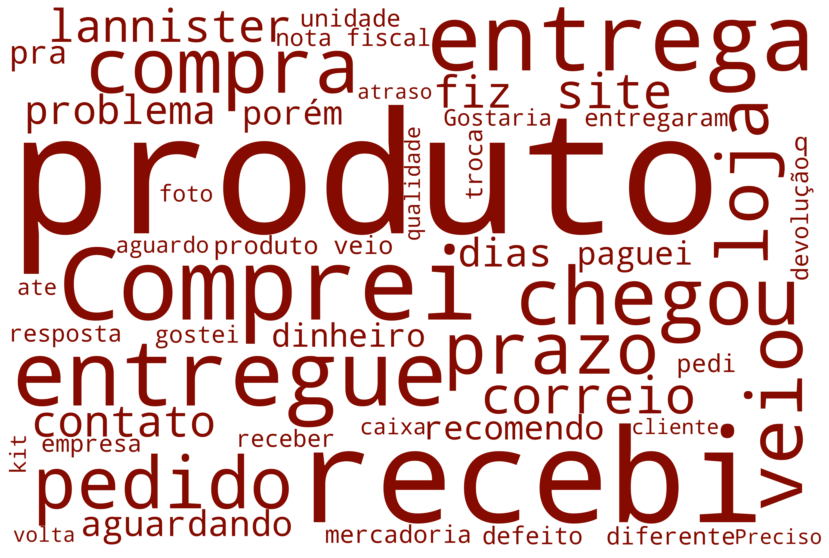

In [43]:
#bad_score_reviews
wc_bad = WordCloud(background_color="white",           # select background color
               width=3000,                         # set wight
               height=2000,                        # set height
               max_words=50,
                  stopwords=stop).generate(' '.join(bad_reviews.review_comment_message.dropna(axis=0)) )     # set max amount of words

wc_bad.recolor(color_func = byM.red_func)          # set the word color to black
plt.figure(figsize=[15,10])                        # set the figsize
plt.imshow(wc_bad, interpolation="bilinear")           # plot the wordcloud
plt.axis("off")                                    # remove plot axes
plt.savefig('Olist_saved/WC_Bad.png')   

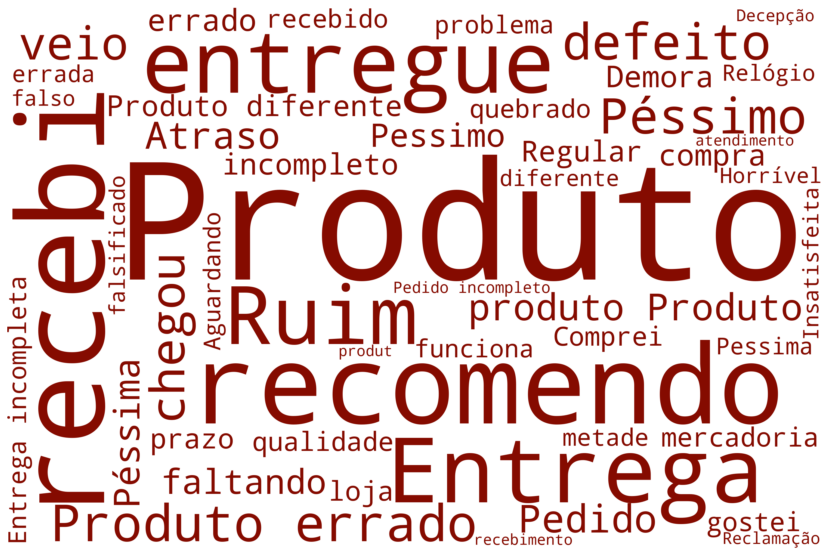

In [44]:
#bad_score_title
wc_bad_title = WordCloud(background_color="white", width=3000, height=2000, max_words=50,
                        stopwords=stop).generate(' '.join(bad_reviews.review_comment_title.dropna(axis=0)) )    

wc_bad_title.recolor(color_func = byM.red_func)          
plt.figure(figsize=[15,10])                        
plt.imshow(wc_bad_title, interpolation="bilinear")           
plt.axis("off")                                    
plt.savefig('Olist_saved/WC_Title_Bad.png')   

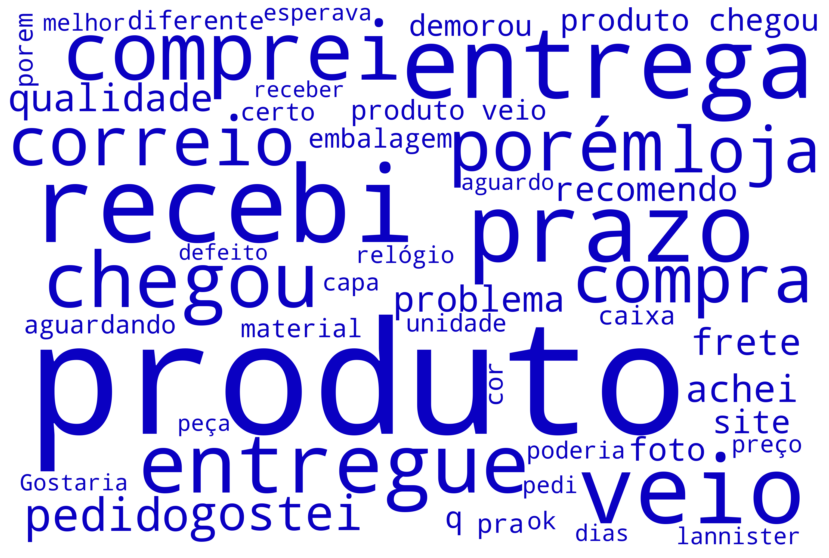

In [45]:
#neutral_score_review
wc_neutral = WordCloud(background_color="white", width=3000, height=2000,max_words=50,
                      stopwords=stop).generate(' '.join(neutral_reviews.review_comment_message.dropna(axis=0)) )

wc_neutral.recolor(color_func = byM.blue_func)          
plt.figure(figsize=[15,10])                       
plt.imshow(wc_neutral, interpolation="bilinear")          
plt.axis("off")                                    
plt.savefig('Olist_saved/WC_Neutral.png')   

## _______________________________________________________Marketing Funnel data

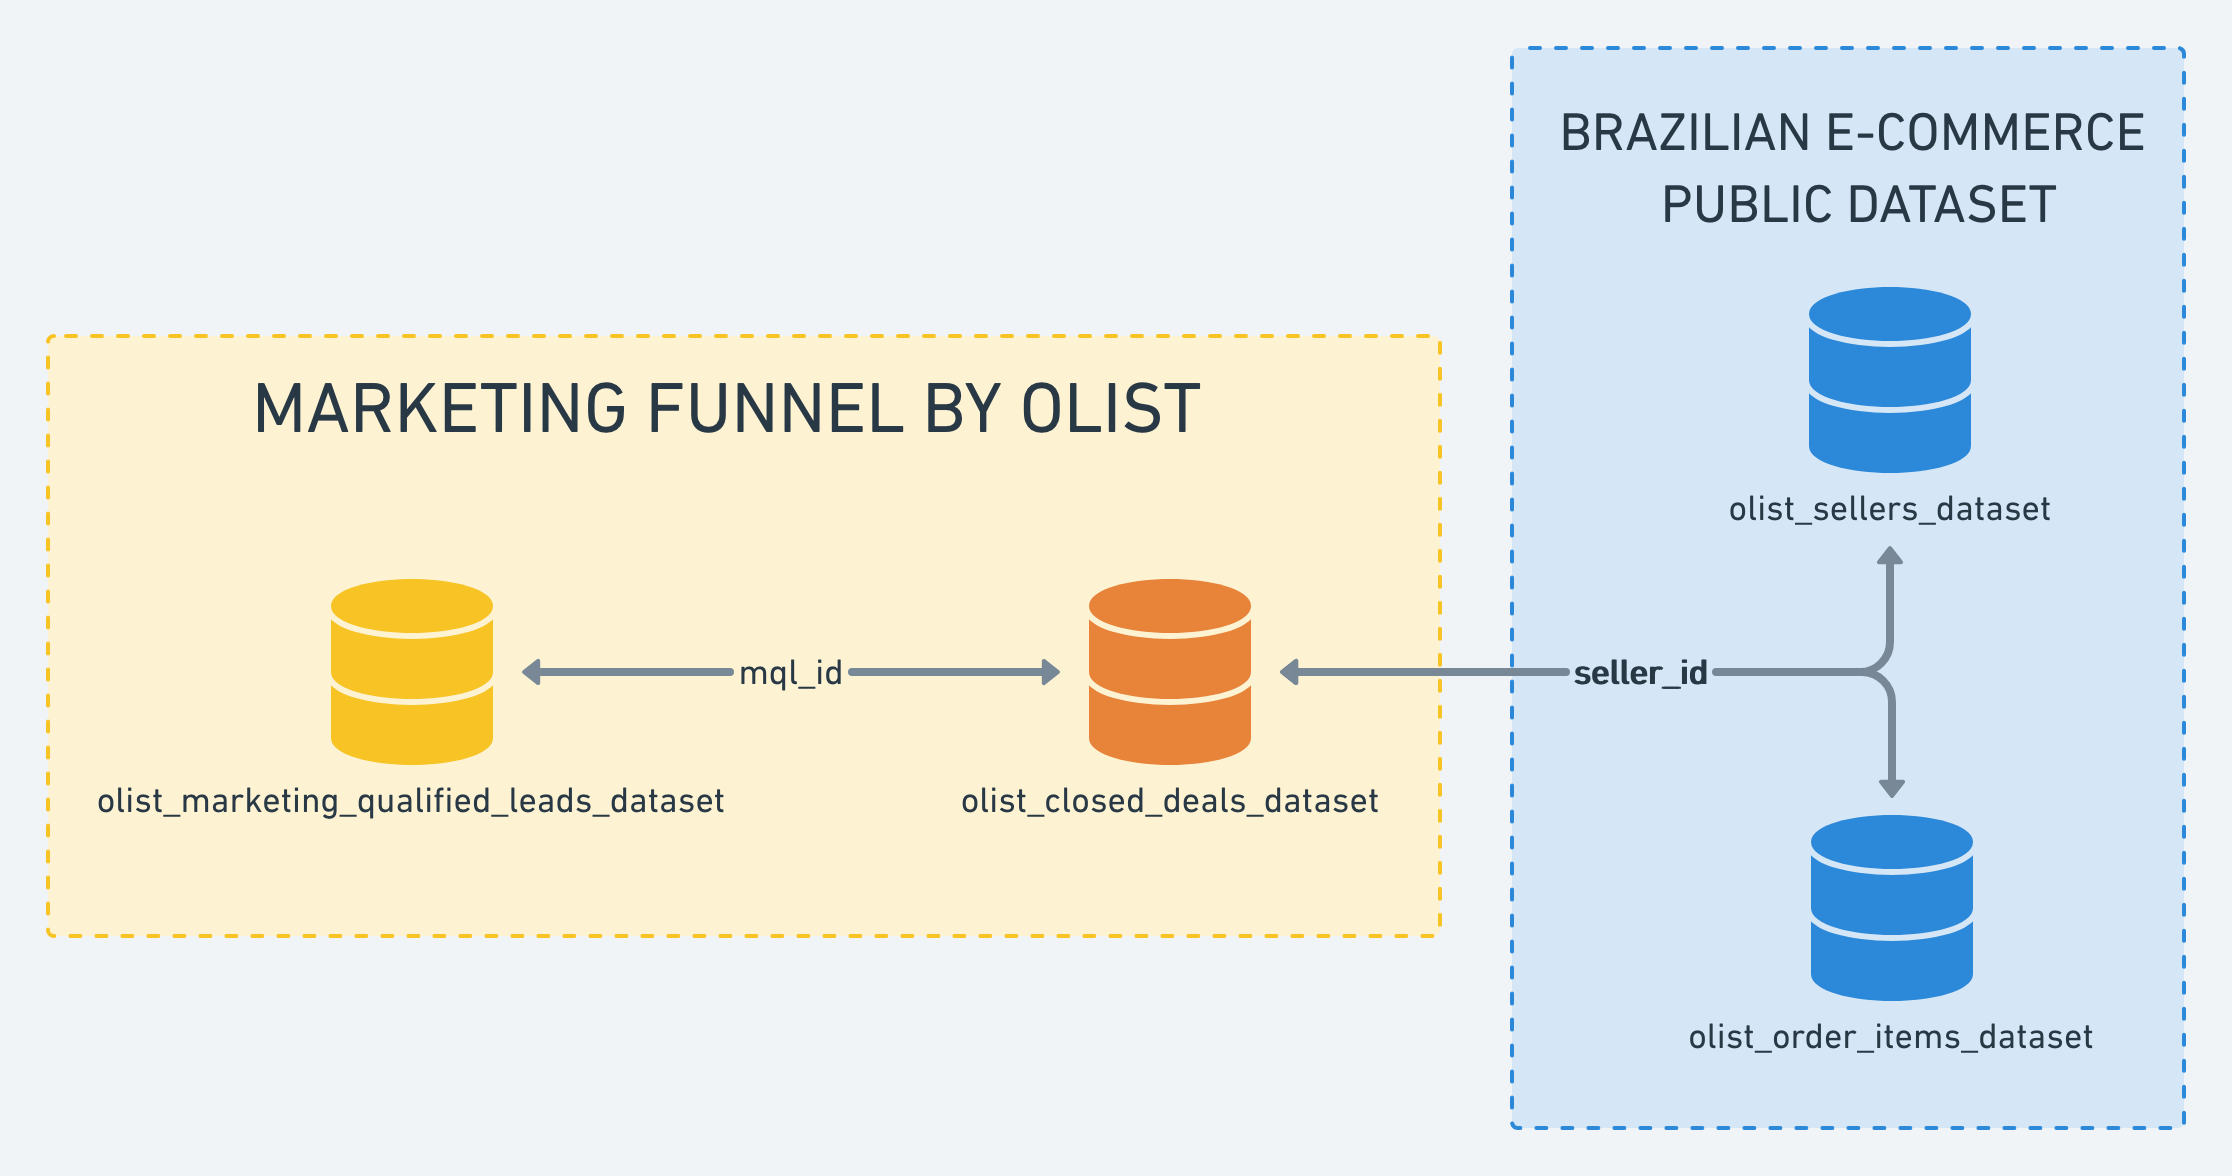

In [46]:
Image(filename='Olist_pics/Jory0O3.png') 

### 08. MQL

In [47]:
mql=pd.read_csv('Olist_data/olist_marketing_qualified_leads_dataset.csv', parse_dates=['first_contact_date'])
byM.datasummary(mql).fillna('').replace(0,'')

Dataset Shape: (8000, 4)


,dtypes,count,unique,missing,top,freq,mean,min,25%,50%,75%,max,First Value
mql_id,object,8000,8000,,3c38bf04ae972211c47d7de393fcccc8,1,,,,,,,dac32acd4db4c29c230538b72f8dd87d
first_contact_date,datetime64[ns],8000,,,,,2018-02-05 14:19:51.599998976,2017-06-14 00:00:00,2017-12-31 00:00:00,2018-02-25 00:00:00,2018-04-15 06:00:00,2018-05-31 00:00:00,2018-02-01 00:00:00
landing_page_id,object,8000,495,,b76ef37428e6799c421989521c0e5077,912,,,,,,,88740e65d5d6b056e0cda098e1ea6313
origin,object,7940,10,60,organic_search,2296,,,,,,,social


##### Observations:
- 8000 diferent MQL
- from 2017-06-14 to 2018-05-31
- with 495 unique landing pages (the most common page is repeated 912 times)
- and leads coming from 10 different sources + 60 leads not reported('missing')

In [48]:
# monthly MQL volume table
mql['first_contact_date(y-m)'] = mql['first_contact_date'].dt.to_period('M')
monthly_mql = mql.groupby(by='first_contact_date(y-m)').mql_id.count()
monthly_mql.to_frame().T

first_contact_date(y-m),2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
mql_id,4,239,386,312,416,445,200,1141,1028,1174,1352,1303


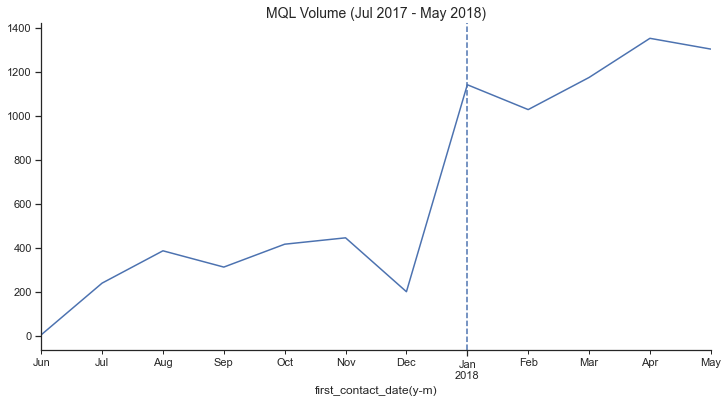

In [49]:
# Visualize monthly MQL volume
monthly_mql.plot.line(figsize=(12, 6))
plt.title('MQL Volume (Jul 2017 - May 2018)', fontsize=14)
plt.axvline('Jan,2018', linestyle= '--')

#### Observations:
    - MQL Volume big jump in Jan, 2018. A probable high mkt investment at the end of 2017

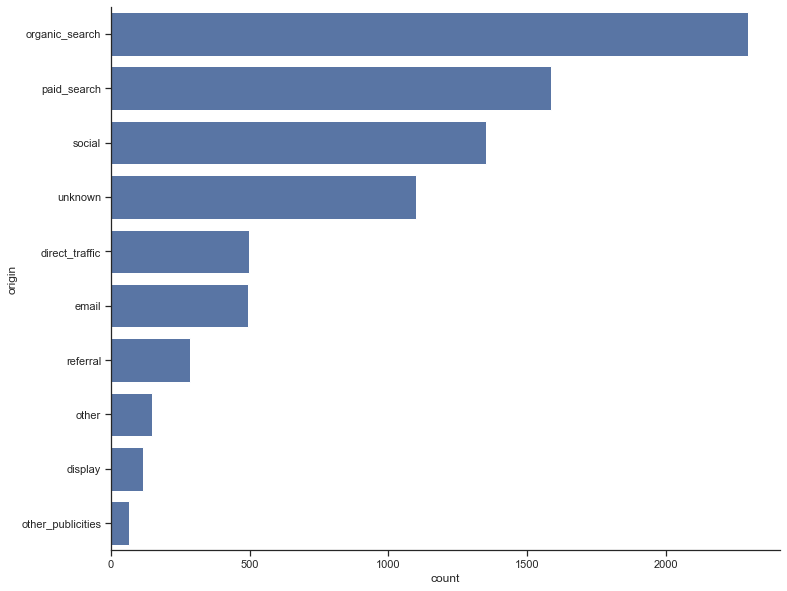

In [50]:
# MQL Volume by Marketing Channel
sns.countplot(y='origin', data=mql, color=base_color, order = mql['origin'].value_counts().index)
plt.show()

Next Steps:
- Group np.nan+ unknown 
- and other+other_publicities

In [51]:
# Monthly MQL Volume per channel
mql_origin = pd.pivot_table(mql,index='origin',columns='first_contact_date(y-m)',values='mql_id',aggfunc='count',fill_value=0)
origin_list = mql.groupby('origin').mql_id.count().sort_values(ascending=False).index
mql_origin = mql_origin.reindex(origin_list)
mql_origin

first_contact_date(y-m),2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
origin,,,,,,,,,,,,
organic_search,0,54,122,78,125,121,60,412,291,340,349,344
paid_search,0,56,79,64,100,70,35,170,212,262,272,266
social,0,12,45,56,52,95,39,162,156,139,325,269
unknown,1,35,70,39,53,63,25,151,156,186,166,154
direct_traffic,0,16,22,22,23,26,10,82,65,80,75,78
email,1,19,24,23,30,37,12,61,68,74,50,94
referral,0,8,16,12,8,20,9,41,34,38,45,53
other,0,12,3,9,8,3,1,39,16,22,26,11
display,1,19,2,5,5,6,5,11,18,16,19,11


- Paid search is the second biggest contributor to lead generation after 'organic search'.
- The third one is 'social' which acquired MQLs more than or similar to 'paid search' since April 2018.
- If the marginal cost of paid search increases, it would be possible to examine effectiveness of 'social' as an alternative.

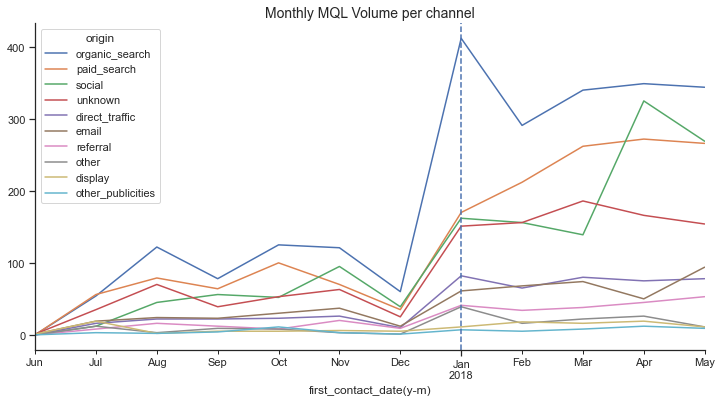

In [52]:
mql_origin.T.plot(kind='line',figsize=(12, 6))
plt.title('Monthly MQL Volume per channel', fontsize=14)
plt.axvline('Jan,2018', linestyle= '--')
plt.savefig('Olist_saved/monthlyVolumebychannel.png')
plt.show()

### 09. Closed Deals

In [53]:
closed = pd.read_csv('Olist_data/olist_closed_deals_dataset.csv', parse_dates=['won_date'])
byM.datasummary(closed).fillna('').replace(0,'')

Dataset Shape: (842, 14)


,dtypes,count,unique,missing,top,freq,mean,min,25%,50%,75%,max,std,First Value
mql_id,object,842.00,842,,c028b7dd285d13e19ff7a4cabf8bf700,1,,,,,,,,5420aad7fec3549a85876ba1c529bd84
seller_id,object,842.00,842,,4a1917ef994878940e1fb03eeb787ad7,1,,,,,,,,2c43fb513632d29b3b58df74816f1b06
sdr_id,object,842.00,32,,4b339f9567d060bcea4f5136b9f5949e,140,,,,,,,,a8387c01a09e99ce014107505b92388c
sr_id,object,842.00,22,,4ef15afb4b2723d8f3d81e51ec7afefe,133,,,,,,,,4ef15afb4b2723d8f3d81e51ec7afefe
won_date,datetime64[ns],842.00,,,,,2018-04-23 06:04:00.891923456,2017-12-05 02:00:00,2018-03-07 12:48:36.249999872,2018-04-13 21:22:15,2018-05-21 17:38:27.500000,2018-11-14 18:04:19,,2018-02-26 19:58:54
business_segment,object,841.00,33,1,home_decor,105,,,,,,,,pet
lead_type,object,836.00,8,6,online_medium,332,,,,,,,,online_medium
lead_behaviour_profile,object,665.00,9,177,cat,407,,,,,,,,cat
has_company,object,63.00,2,779,True,58,,,,,,,,
has_gtin,object,64.00,2,778,True,54,,,,,,,,


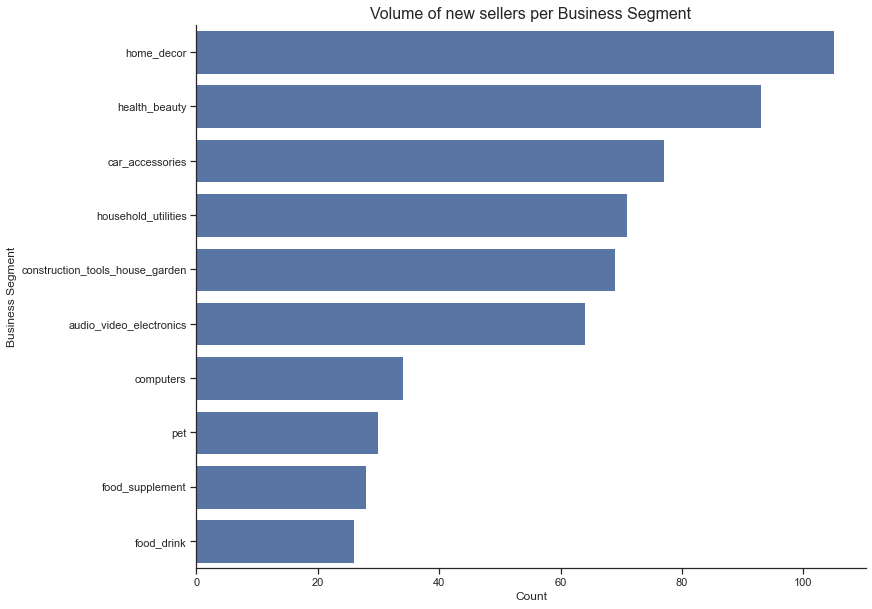

In [54]:
#Volume of new sellers per Business Segment 
sns.barplot(y=closed.business_segment.value_counts().nlargest(10).index, x=closed.business_segment.value_counts().nlargest(10),color=base_color)
plt.title('Volume of new sellers per Business Segment',fontsize=16)
plt.ylabel('Business Segment',fontsize=12)
plt.xlabel('Count',fontsize=12)
plt.show()

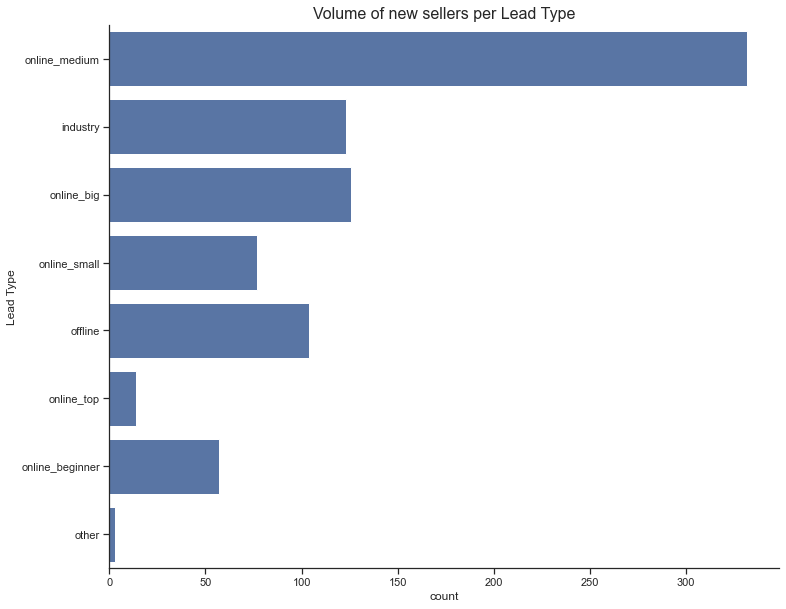

In [55]:
#Volume of new sellers per Lead Type
sns.countplot(y='lead_type', data=closed, color=base_color)
plt.title('Volume of new sellers per Lead Type',fontsize=16)
plt.ylabel('Lead Type',fontsize=12)
plt.show()

In [56]:
#Monthly Seller Closed Deals Volume
closed_mql=pd.merge(closed, mql, how='left', on='mql_id')
closedby_origin = pd.pivot_table(closed_mql,index='origin',columns='first_contact_date(y-m)',values='mql_id', aggfunc='count',fill_value=0)
origin_list = closed_mql.groupby('origin').mql_id.count().sort_values(ascending=False).index
closed_mql_origin = closedby_origin.reindex(origin_list)
closed_mql_origin.style.background_gradient(axis=None,cmap='Blues')

first_contact_date(y-m),2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
origin,,,,,,,,,,,
organic_search,0,2,5,1,4,4,63,39,52,59,42
paid_search,0,3,2,7,6,2,20,43,39,43,30
unknown,1,1,0,3,4,2,33,34,40,35,26
social,0,3,0,2,4,0,8,15,16,16,11
direct_traffic,0,0,0,0,0,2,18,9,7,13,7
referral,0,0,0,0,0,0,3,3,2,8,8
email,0,0,0,1,0,0,1,4,4,3,2
display,0,0,0,0,0,1,0,1,1,2,1
other,0,0,0,0,0,0,1,0,1,2,0


In [57]:
# Visualize monthly conversion rate by channel
cr=(100*closed_mql_origin/mql_origin).fillna(0)
cr.style.background_gradient(axis=None,cmap='Blues')

first_contact_date(y-m),2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
origin,,,,,,,,,,,,
direct_traffic,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,21.951220,13.846154,8.750000,17.333333,8.974359
display,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,5.555556,6.250000,10.526316,9.090909
email,0.000000,0.000000,0.000000,0.000000,3.333333,0.000000,0.000000,1.639344,5.882353,5.405405,6.000000,2.127660
organic_search,0.000000,0.000000,1.639344,6.410256,0.800000,3.305785,6.666667,15.291262,13.402062,15.294118,16.905444,12.209302
other,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.564103,0.000000,4.545455,7.692308,0.000000
other_publicities,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.571429,0.000000,12.500000,0.000000,0.000000
paid_search,0.000000,0.000000,3.797468,3.125000,7.000000,8.571429,5.714286,11.764706,20.283019,14.885496,15.808824,11.278195
referral,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.317073,8.823529,5.263158,17.777778,15.094340
social,0.000000,0.000000,6.666667,0.000000,3.846154,4.210526,0.000000,4.938272,9.615385,11.510791,4.923077,4.089219


In [58]:
#### Acquisition process lenght
closed_mql['acq_len']=closed_mql['won_date']-closed_mql['first_contact_date']
closed_mql['acq_len']=closed_mql.acq_len.dt.days
byM.datasummary(closed_mql).fillna('').replace(0,'')

Dataset Shape: (842, 19)


,dtypes,count,unique,missing,top,freq,mean,min,25%,50%,75%,max,std,First Value
mql_id,object,842.00,842,,c028b7dd285d13e19ff7a4cabf8bf700,1,,,,,,,,5420aad7fec3549a85876ba1c529bd84
seller_id,object,842.00,842,,4a1917ef994878940e1fb03eeb787ad7,1,,,,,,,,2c43fb513632d29b3b58df74816f1b06
sdr_id,object,842.00,32,,4b339f9567d060bcea4f5136b9f5949e,140,,,,,,,,a8387c01a09e99ce014107505b92388c
sr_id,object,842.00,22,,4ef15afb4b2723d8f3d81e51ec7afefe,133,,,,,,,,4ef15afb4b2723d8f3d81e51ec7afefe
won_date,datetime64[ns],842.00,,,,,2018-04-23 06:04:00.891923456,2017-12-05 02:00:00,2018-03-07 12:48:36.249999872,2018-04-13 21:22:15,2018-05-21 17:38:27.500000,2018-11-14 18:04:19,,2018-02-26 19:58:54
business_segment,object,841.00,33,1,home_decor,105,,,,,,,,pet
lead_type,object,836.00,8,6,online_medium,332,,,,,,,,online_medium
lead_behaviour_profile,object,665.00,9,177,cat,407,,,,,,,,cat
has_company,object,63.00,2,779,True,58,,,,,,,,
has_gtin,object,64.00,2,778,True,54,,,,,,,,


C:\Users\monts\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\monts\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


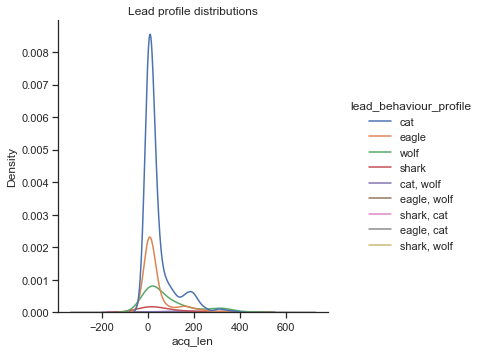

In [59]:
closed_mql[closed_mql['acq_len']<0]
sns.displot(closed_mql, x='acq_len', hue='lead_behaviour_profile', kind='kde')
plt.title('Lead profile distributions')
plt.show()

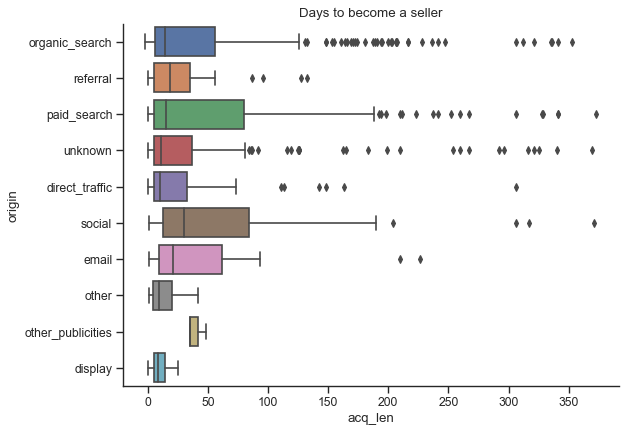

In [60]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(x='acq_len', y='origin', data=closed_mql)
#sns.boxplot(x="day", y="total_bill", data=tips)
plt.title('Days to become a seller')
plt.savefig('Olist_saved/SellerAcquisitionlength.png')
plt.show()

In [61]:
IQR_df=byM.tukey_rule(closed_mql,'acq_len')
Outliers_df=closed_mql[~closed_mql.acq_len.isin(IQR_df.acq_len)]
print(Outliers_df.acq_len.min(), Outliers_df.acq_len.max())
print(IQR_df.acq_len.min(), IQR_df.acq_len.max())

130 427
-2 127


In [62]:
Outliers_df.describe()

,declared_product_catalog_size,declared_monthly_revenue,acq_len
count,57.00,107.00,107.00
mean,222.14,575878.56,219.84
std,370.41,4884818.13,71.34
min,1.00,0.00,130.00
25%,30.00,0.00,163.50
50%,80.00,0.00,198.00
75%,200.00,22500.00,263.50
max,2000.00,50000000.00,427.00
